In [1]:
from pandas import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer

In [2]:
df = pd.read_csv('NationalNames.csv')
print ("%d names in dataset" %len(df))
df = df.drop_duplicates(subset="Name")
df.head(10)


1825433 names in dataset


,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414
8,9,Bertha,1880,F,1320
9,10,Sarah,1880,F,1288


In [3]:
print (df[df.Gender == 'F'].count())

Id        59930
Name      59930
Year      59930
Gender    59930
Count     59930
dtype: int64


In [4]:
print (df[df.Gender == 'M'].count())

Id        33959
Name      33959
Year      33959
Gender    33959
Count     33959
dtype: int64


In [5]:
Xfeatures =df['Name']
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)
# Labels
y = df.Gender


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [8]:
clf.score(X_train,y_train)

1.0

In [9]:
clf.score(X_test,y_test)

0.6395782298434338

In [10]:
# Check if the name ends in vowel
def checkVowelEnd(name):
    if name[-1] in "aeiou":
        return "Vowel End"
    return "Consonant End"

In [11]:
df["Vowel/Consonant End"] = df["Name"].apply(checkVowelEnd)
df.head()

,Id,Name,Year,Gender,Count,Vowel/Consonant End
0,1,Mary,1880,F,7065,Consonant End
1,2,Anna,1880,F,2604,Vowel End
2,3,Emma,1880,F,2003,Vowel End
3,4,Elizabeth,1880,F,1939,Consonant End
4,5,Minnie,1880,F,1746,Vowel End


In [12]:
def checkGender(gender):
    if gender == "F":
        return 0
    else:
        return 1
    
df["Gender Value"] = df["Gender"].apply(checkGender)

df.head(-20)
#df.count

,Id,Name,Year,Gender,Count,Vowel/Consonant End,Gender Value
0,1,Mary,1880,F,7065,Consonant End,0
1,2,Anna,1880,F,2604,Vowel End,0
2,3,Emma,1880,F,2003,Vowel End,0
3,4,Elizabeth,1880,F,1939,Consonant End,0
4,5,Minnie,1880,F,1746,Vowel End,0
...,...,...,...,...,...,...,...
1825351,1825352,Yarell,2014,M,5,Consonant End,1
1825354,1825355,Yazziel,2014,M,5,Consonant End,1
1825355,1825356,Yeidan,2014,M,5,Consonant End,1
1825356,1825357,Yexiel,2014,M,5,Consonant End,1


In [49]:
def compare(group):
    return df.groupby([group])["Gender Value"].sum()*100/df.groupby([group])["Gender Value"].count()

In [50]:
# df.groupby(["Vowel/Consonant End"])['Gender Value'].count()
# df.head()
g=df.groupby(['Vowel/Consonant End','Gender Value'])
g.head()

,Id,Name,Year,Gender,Count,Vowel/Consonant End,Gender Value,Vowel/Consonant Start
0,1,Mary,1880,F,7065,Consonant End,0,consonant Start
1,2,Anna,1880,F,2604,Vowel End,0,consonant Start
2,3,Emma,1880,F,2003,Vowel End,0,consonant Start
3,4,Elizabeth,1880,F,1939,Consonant End,0,consonant Start
4,5,Minnie,1880,F,1746,Vowel End,0,consonant Start
5,6,Margaret,1880,F,1578,Consonant End,0,consonant Start
6,7,Ida,1880,F,1472,Vowel End,0,consonant Start
7,8,Alice,1880,F,1414,Vowel End,0,consonant Start
9,10,Sarah,1880,F,1288,Consonant End,0,consonant Start
21,22,Mabel,1880,F,808,Consonant End,0,consonant Start


In [15]:
print (len(df))
# > 93889 = 43635 + 50254

93889


In [16]:
#female_names = sum(df.groupby(["Vowel/Consonant End"])["Gender Value"].sum())
female_names =( df.groupby(['Vowel/Consonant End','Gender Value'])).size()

all_names = df.groupby(["Gender"])["Gender Value"].count()
print (female_names)
#print (all_names)
# print ("\nBoth are equal? %s" % str(female_names == all_names["F"]))

Vowel/Consonant End  Gender Value
Consonant End        0               17506
                     1               26129
Vowel End            0               42424
                     1                7830
dtype: int64


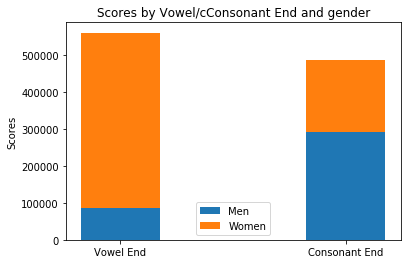

In [45]:
import numpy as np
import matplotlib.pyplot as plt

N = 2
womenMeans = (473746,195035)
MenMeans = (87440,291503)
menStd = (2, 3)
womenStd = (6, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, MenMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,bottom=MenMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by Vowel/cConsonant End and gender')
plt.xticks(ind, ('Vowel End', 'Consonant End'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [46]:
print(df.groupby(["Vowel/Consonant End"])["Gender Value"].sum()*100/df.groupby(["Vowel/Consonant End"])["Gender Value"].count())

Vowel/Consonant End
Consonant End    59.880830
Vowel End        15.580849
Name: Gender Value, dtype: float64


In [47]:
print(compare("Vowel/Consonant End"))

Vowel/Consonant End
Consonant End    59.880830
Vowel End        15.580849
Name: Gender Value, dtype: float64


In [48]:
def vowelConsonantstart(name):
    if name[0] in "aeiou":
        return "vowel start"
    else:
        return "consonant Start"
        
df["Vowel/Consonant Start"] = df["Name"].apply(vowelConsonantstart)
names =( df.groupby(['Vowel/Consonant Start','Gender Value'])).size()
print(names)
#print("\n Comparison => %s", compare("Vowel/Consonant Start"))
df.head()

Vowel/Consonant Start  Gender Value
consonant Start        0               59930
                       1               33959
dtype: int64


,Id,Name,Year,Gender,Count,Vowel/Consonant End,Gender Value,Vowel/Consonant Start
0,1,Mary,1880,F,7065,Consonant End,0,consonant Start
1,2,Anna,1880,F,2604,Vowel End,0,consonant Start
2,3,Emma,1880,F,2003,Vowel End,0,consonant Start
3,4,Elizabeth,1880,F,1939,Consonant End,0,consonant Start
4,5,Minnie,1880,F,1746,Vowel End,0,consonant Start


In [51]:
def shortLongName(name):
    if len(name) < 7:
        return "Short"
    else:
        return "Long"

df["Short/Long Name"] = df["Name"].apply(shortLongName)
longshort_name =( df.groupby(['Short/Long Name','Gender Value'])).size()
print(longshort_name)
#print(compare("Short/Long Name"))
df.head()

Short/Long Name  Gender Value
Long             0               32331
                 1               13438
Short            0               27599
                 1               20521
dtype: int64


,Id,Name,Year,Gender,Count,Vowel/Consonant End,Gender Value,Vowel/Consonant Start,Short/Long Name
0,1,Mary,1880,F,7065,Consonant End,0,consonant Start,Short
1,2,Anna,1880,F,2604,Vowel End,0,consonant Start,Short
2,3,Emma,1880,F,2003,Vowel End,0,consonant Start,Short
3,4,Elizabeth,1880,F,1939,Consonant End,0,consonant Start,Long
4,5,Minnie,1880,F,1746,Vowel End,0,consonant Start,Short


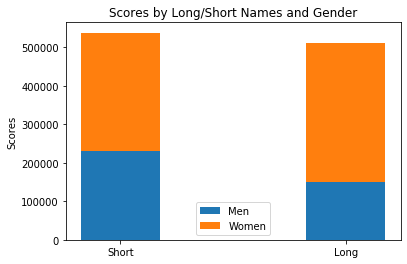

In [52]:
import numpy as np
import matplotlib.pyplot as plt

N = 2
womenMeans = (308281,360709)
MenMeans = (229637,149946)
menStd = (2, 3)
womenStd = (6, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, MenMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,bottom=MenMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by Long/Short Names and Gender')
plt.xticks(ind, ('Short', 'Long'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [53]:
# By Analogy most female names ends in 'A' or 'E' or has the sound of 'A'
def features(name):
    name = name.lower()
    return {
        'first-letter'  : name[0], # First letter
        'first2-letters': name[0:2], # First 2 letters
        'first3-letters': name[0:3], # First 3 letters
        'last-letter'   : name[-1],
        'last2-letters' : name[-2:],
        'last3-letters' : name[-3:],
    }

In [54]:
df["features"] = df["Name"].apply(features)
df.head()

,Id,Name,Year,Gender,Count,Vowel/Consonant End,Gender Value,Vowel/Consonant Start,Short/Long Name,features
0,1,Mary,1880,F,7065,Consonant End,0,consonant Start,Short,"{'first-letter': 'm', 'first2-letters': 'ma', ..."
1,2,Anna,1880,F,2604,Vowel End,0,consonant Start,Short,"{'first-letter': 'a', 'first2-letters': 'an', ..."
2,3,Emma,1880,F,2003,Vowel End,0,consonant Start,Short,"{'first-letter': 'e', 'first2-letters': 'em', ..."
3,4,Elizabeth,1880,F,1939,Consonant End,0,consonant Start,Long,"{'first-letter': 'e', 'first2-letters': 'el', ..."
4,5,Minnie,1880,F,1746,Vowel End,0,consonant Start,Short,"{'first-letter': 'm', 'first2-letters': 'mi', ..."


In [55]:
def checkfeature(name):
    if name[-1] in "a,e":
        return "a"
    return "b"
df["Feature End"] = df["Name"].apply(checkfeature)
df.head(-20)

,Id,Name,Year,Gender,Count,Vowel/Consonant End,Gender Value,Vowel/Consonant Start,Short/Long Name,features,Feature End
0,1,Mary,1880,F,7065,Consonant End,0,consonant Start,Short,"{'first-letter': 'm', 'first2-letters': 'ma', ...",b
1,2,Anna,1880,F,2604,Vowel End,0,consonant Start,Short,"{'first-letter': 'a', 'first2-letters': 'an', ...",a
2,3,Emma,1880,F,2003,Vowel End,0,consonant Start,Short,"{'first-letter': 'e', 'first2-letters': 'em', ...",a
3,4,Elizabeth,1880,F,1939,Consonant End,0,consonant Start,Long,"{'first-letter': 'e', 'first2-letters': 'el', ...",b
4,5,Minnie,1880,F,1746,Vowel End,0,consonant Start,Short,"{'first-letter': 'm', 'first2-letters': 'mi', ...",a
...,...,...,...,...,...,...,...,...,...,...,...
1825351,1825352,Yarell,2014,M,5,Consonant End,1,consonant Start,Short,"{'first-letter': 'y', 'first2-letters': 'ya', ...",b
1825354,1825355,Yazziel,2014,M,5,Consonant End,1,consonant Start,Long,"{'first-letter': 'y', 'first2-letters': 'ya', ...",b
1825355,1825356,Yeidan,2014,M,5,Consonant End,1,consonant Start,Short,"{'first-letter': 'y', 'first2-letters': 'ye', ...",b
1825356,1825357,Yexiel,2014,M,5,Consonant End,1,consonant Start,Short,"{'first-letter': 'y', 'first2-letters': 'ye', ...",b


In [56]:
g=df.groupby(['Feature End','Gender'])
g.head()

,Id,Name,Year,Gender,Count,Vowel/Consonant End,Gender Value,Vowel/Consonant Start,Short/Long Name,features,Feature End
0,1,Mary,1880,F,7065,Consonant End,0,consonant Start,Short,"{'first-letter': 'm', 'first2-letters': 'ma', ...",b
1,2,Anna,1880,F,2604,Vowel End,0,consonant Start,Short,"{'first-letter': 'a', 'first2-letters': 'an', ...",a
2,3,Emma,1880,F,2003,Vowel End,0,consonant Start,Short,"{'first-letter': 'e', 'first2-letters': 'em', ...",a
3,4,Elizabeth,1880,F,1939,Consonant End,0,consonant Start,Long,"{'first-letter': 'e', 'first2-letters': 'el', ...",b
4,5,Minnie,1880,F,1746,Vowel End,0,consonant Start,Short,"{'first-letter': 'm', 'first2-letters': 'mi', ...",a
5,6,Margaret,1880,F,1578,Consonant End,0,consonant Start,Long,"{'first-letter': 'm', 'first2-letters': 'ma', ...",b
6,7,Ida,1880,F,1472,Vowel End,0,consonant Start,Short,"{'first-letter': 'i', 'first2-letters': 'id', ...",a
7,8,Alice,1880,F,1414,Vowel End,0,consonant Start,Short,"{'first-letter': 'a', 'first2-letters': 'al', ...",a
9,10,Sarah,1880,F,1288,Consonant End,0,consonant Start,Short,"{'first-letter': 's', 'first2-letters': 'sa', ...",b
21,22,Mabel,1880,F,808,Consonant End,0,consonant Start,Short,"{'first-letter': 'm', 'first2-letters': 'ma', ...",b


In [57]:
names =(df.groupby(['Feature End','Gender'])).size()
#female_names =(df.groupby(['features','Gender Value'])).count()

#all_names = df.groupby(["Gender"])["Gender Value"].count()
print (names)

Feature End  Gender
a            F         38333
             M          4212
b            F         21597
             M         29747
dtype: int64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 2
womenMeans = (395312,225233)
MenMeans = (69206,357878)
menStd = (2, 3)
womenStd = (6, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, MenMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,bottom=MenMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by Names Ending with A,E ir has the sound of A and Gender')
plt.xticks(ind, ('A,E ir has the sound of A', 'Y'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [ ]:
#df.info()
# training_data = df[['Gender Value', 'Vowel/Consonant Start', 'Short/Long Name', 'Vowel/Consonant End']]
# training_data.head()
X= df[['Vowel/Consonant Start', 'Short/Long Name', 'Vowel/Consonant End','Feature End']]
y= df ['Gender Value']
#X.head()
#y.head()

In [ ]:
def reprCategory(column):
    column = column.astype("category")
    return column.cat.codes
    
# training_data[["Vowel/Consonant End", "Short/Long Name", "Vowel/Consonant Start"]] = training_data[["Vowel/Consonant End", "Short/Long Name", "Vowel/Consonant Start"]].apply(reprCategory)
# training_data.info()
#len(training_data)

X[["Vowel/Consonant End", "Short/Long Name", "Vowel/Consonant Start","Feature End"]] = X[["Vowel/Consonant End", "Short/Long Name", "Vowel/Consonant Start","Feature End"]].apply(reprCategory)
#training_data.head()
X.head()


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20)

In [ ]:
# train, test = train_test_split(training_data, test_size = 0.20)

In [ ]:
len(X_train)

In [ ]:
len(y_train)

In [ ]:
len(X_test)

In [ ]:
len(y_test)

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,y_train)


In [ ]:
clf.score(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
clf.predict(X_test)

In [ ]:
y_test

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
 clf

In [ ]:
clf.feature_importances_

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nbclf = MultinomialNB()
nbclf.fit(X_train,y_train)
#nbclf.score(dv.transform(X_train),y_train)

In [ ]:
nbclf

In [ ]:
nbclf.score(X_train,y_train)

In [ ]:
nbclf.score(X_test,y_test)

In [ ]:
#predictions = clf.predict(X_test,y_test[["Vowel/Consonant End", "Short/Long Name", "Vowel/Consonant Start","Feature End"]])
# accuracy_score(X_test,y_test["Gender Value"], predictions)

In [ ]:
with open("decidenamesE.dot", "w") as dot_file:
    dot_file = export_graphviz(clf,
                            feature_names=["Vowel/Consonant End", "Short/Long Name", "Vowel/Consonant Start","Feature End"], out_file=dot_file)

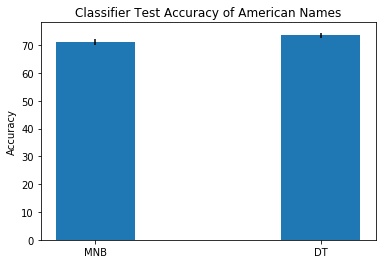

In [60]:
import numpy as np
import matplotlib.pyplot as plt

N = 2
Testscore = (71.17,73.52)
TrainMeans = (73.44,73.)
menStd = (1,1)
#womenStd = (6, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, Testscore, width, yerr=menStd)
#p2 = plt.bar(ind, womenMeans, width,bottom=MenMeans, yerr=womenStd)


plt.ylabel('Accuracy')
plt.title('Classifier Test Accuracy of American Names')
plt.xticks(ind, ('MNB','DT'))
#plt.yticks(np.arange(0, 81, 10))
#plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()